In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

In [30]:
df = pd.read_csv('rainfall_dataset_OlympicPark.csv', parse_dates =['date'])
print(df.isnull().sum(axis=0))
df.head(10)


date                             0
station name                     0
Year                             0
Month                            0
day of week                      0
Day                              0
Rainfall amount (millimetres)    0
dtype: int64


,date,station name,Year,Month,day of week,Day,Rainfall amount (millimetres)
0,2015-01-01,Olympic Park,2015,1,Thursday,1,0.0
1,2015-01-02,Olympic Park,2015,1,Friday,2,0.0
2,2015-01-03,Olympic Park,2015,1,Saturday,3,0.0
3,2015-01-04,Olympic Park,2015,1,Sunday,4,4.2
4,2015-01-05,Olympic Park,2015,1,Monday,5,0.0
5,2015-01-06,Olympic Park,2015,1,Tuesday,6,0.0
6,2015-01-07,Olympic Park,2015,1,Wednesday,7,0.0
7,2015-01-08,Olympic Park,2015,1,Thursday,8,19.4
8,2015-01-09,Olympic Park,2015,1,Friday,9,1.2
9,2015-01-10,Olympic Park,2015,1,Saturday,10,5.2


**Inspect value**

In [4]:
for col_name in df.columns:
    print('\nUnique value in column', col_name, 'is:\n')
    print(df[col_name].unique())
    print('\n-----------------\n')


Unique value in column date is:

['2015-01-01T00:00:00.000000000' '2015-01-02T00:00:00.000000000'
 '2015-01-03T00:00:00.000000000' ... '2021-02-26T00:00:00.000000000'
 '2021-02-27T00:00:00.000000000' '2021-02-28T00:00:00.000000000']

-----------------


Unique value in column station name is:

['Olympic Park']

-----------------


Unique value in column Year is:

[2015 2016 2017 2018 2019 2020 2021]

-----------------


Unique value in column Month is:

[ 1  2  3  4  5  6  7  8  9 10 11 12]

-----------------


Unique value in column day of week is:

['Thursday' 'Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']

-----------------


Unique value in column Day is:

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]

-----------------


Unique value in column Rainfall amount (millimetres) is:

[ 0.          4.2        19.4         1.2         5.2        15.8
  1.          0.6         9.2         3.8        19.6         0.4
  1.6    

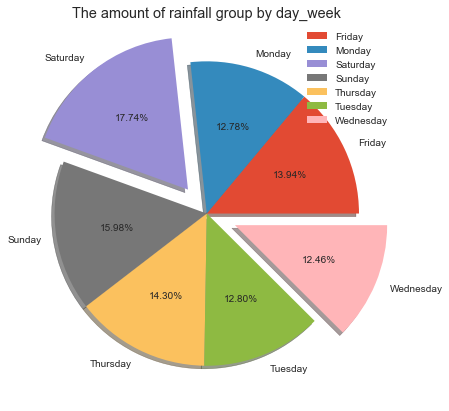

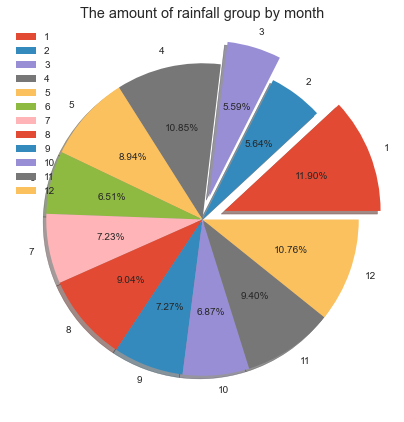

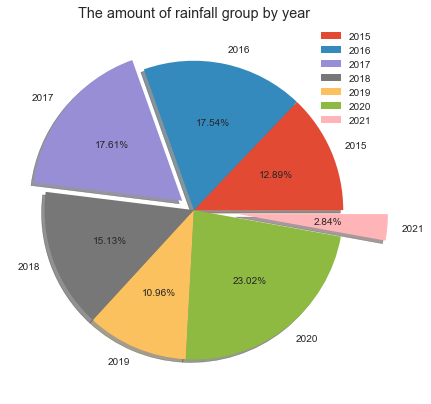

In [14]:
#insepct col Rainfall amount group by day

values = df.groupby(['day of week'])['Rainfall amount (millimetres)'].sum().values
labels = df.groupby(['day of week'])['Rainfall amount (millimetres)'].sum().index

plt.figure(1, figsize= (7,7))
plt.style.use('ggplot')
explode = [0.0, 0, 0.2 , 0, 0, 0, 0.2]
plt.pie(
       values, 
       labels = labels,
       shadow = True,
       autopct= '%0.2f%%',
       explode = explode
)

plt.title('The amount of rainfall group by day_week')
plt.legend(loc = 1)

#insepct col Rainfall amount group by month

values_month = df.groupby(['Month'])['Rainfall amount (millimetres)'].sum().values
labels_month = df.groupby(['Month'])['Rainfall amount (millimetres)'].sum().index
explode_2 = [0.15, 0.0, 0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.figure(2, figsize= (7,8))
plt.style.use('ggplot')

plt.pie(
       values_month, 
       labels = labels_month,
       shadow = True,
       autopct= '%0.2f%%',
       explode = explode_2 )

plt.title('The amount of rainfall group by month')
plt.legend(loc = 2)


#insepct col Rainfall amount groub by year

values_year = df.groupby(['Year'])['Rainfall amount (millimetres)'].sum().values
labels_year = df.groupby(['Year'])['Rainfall amount (millimetres)'].sum().index

plt.figure(3, figsize= (6,6))
plt.style.use('ggplot')

explode_3 = [0, 0, 0.1, 0, 0, 0,0.3]
plt.pie(
       values_year, 
       labels = labels_year,
       shadow = True,
       autopct= '%0.2f%%',
       explode = explode_3
)

plt.title('The amount of rainfall group by year')
plt.legend(loc = 1)

plt.tight_layout()
plt.show()



54.6
0.0


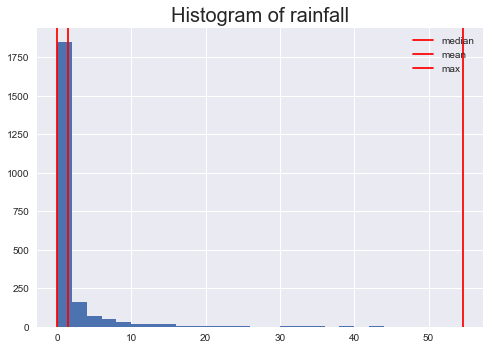

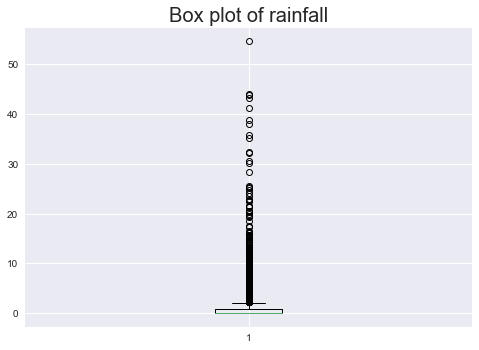

median 0.0
mean 1.5182570512941735
max 54.6
min 0.0


In [29]:
rainfall_amount = df['Rainfall amount (millimetres)'].values
print(np.amax(rainfall_amount))
print(np.amin(rainfall_amount))
plt.style.use('seaborn')
#hist
plt.figure(1)
plt.hist(rainfall_amount,
        range = (0,50),
        bins = 25)
plt.axvline(np.quantile(rainfall_amount, 0.5), c = 'r', label= 'median')
plt.axvline(np.mean(rainfall_amount), c = 'r', label ='mean')
plt.axvline(np.amax(rainfall_amount), c = 'r', label ='max')
#plt.axvline(np.amin(rainfall_amount), c = 'green', label ='min')
plt.title('Histogram of rainfall', fontsize= 20)
plt.legend( loc = 'upper right')
plt.show()
# boxplot
plt.figure(2)
plt.boxplot(rainfall_amount)
plt.title('Box plot of rainfall', fontsize= 20)
plt.show()

print('median',np.median(rainfall_amount))
print('mean',np.average(rainfall_amount))
print('max',np.amax(rainfall_amount))
print('min',np.amin(rainfall_amount))

## Boxplot and Histpgram review:
- Histogram:
- Boxplot:
    

In [7]:
print(df.columns)
df.head(5)

Index(['date', 'station name', 'Year', 'Month', 'day of week', 'Day',
       'Rainfall amount (millimetres)'],
      dtype='object')


,date,station name,Year,Month,day of week,Day,Rainfall amount (millimetres)
0,2015-01-01,Olympic Park,2015,1,Thursday,1,0.0
1,2015-01-02,Olympic Park,2015,1,Friday,2,0.0
2,2015-01-03,Olympic Park,2015,1,Saturday,3,0.0
3,2015-01-04,Olympic Park,2015,1,Sunday,4,4.2
4,2015-01-05,Olympic Park,2015,1,Monday,5,0.0
